In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
places_res = pd.read_csv("../results/output_places_US_knn2.csv")
places_res['name'] = "Naive"
places_knn_res = pd.read_csv("../results/output_places_US_knn_seacnn.csv")
places_knn_res['name'] = "SEA-CNN"

res = pd.concat([
    places_res.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    places_knn_res.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

res

,creation_time,search_time,num_queries,name
0,172846812,12052553419,100000,Naive
1,490011624,92903556845,500000,Naive
2,901933066,198031281350,1000000,Naive
3,1940748131,419322909181,2500000,Naive
4,210519521,11660142249,100000,Naive
5,606187893,87374653715,500000,Naive
6,867310701,209452007862,1000000,Naive
7,2446234806,550983418726,2500000,Naive
8,295598693,8850511595,100000,Naive
9,442297750,72661776036,500000,Naive


In [8]:
# def expName(x):
#     if x == "places":
#         return "0% KNN Queries"
#     elif x == "places_knn_05":
#         return "5% KNN Queries"
#     elif x == "places_knn_10":
#         return "10% KNN Queries"

<AxesSubplot:xlabel='No. of queries', ylabel='Index creation time (sec)'>

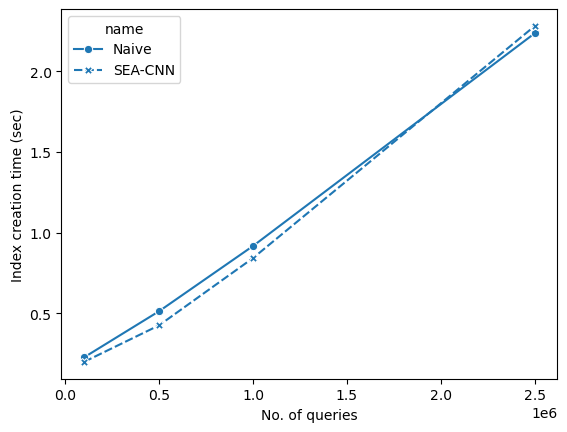

In [9]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

<AxesSubplot:xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

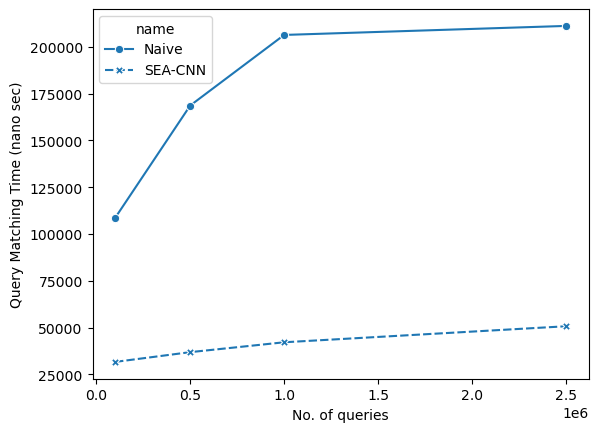

In [10]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', style='name', data=search_res, errorbar=None, markers=True)